In [14]:
# Imports
import pandas as pd
import numpy as np
import os

degrees=[45,50,60,70,75,80,90]

partial_data = {
    'porus' : {deg:None for deg in degrees},
    'non-porus' : {deg:None for deg in degrees}
}

# Load porus partial_data
for k,v in partial_data['porus'].items():
  partial_data['porus'][k]=pd.read_csv(f'./data_csv/DATOS_POROS_PROPIEDADES_EFECTIVAS_AXIALES angulo{k}.csv')

# Load non-porus partial_data
for k,v in partial_data['non-porus'].items():
  partial_data['non-porus'][k]=pd.read_csv(f'./data_csv/DATOS_PROPIEDADES_EFECTIVAS_AXIALES angulo{k}.csv')

# Load extra data from the data_xls/extra files
xls_extra_files = os.listdir('./data_xls/extra') # Scan xls files in the folder


In [15]:
for file in xls_extra_files:
    angle = int(file[42:44])

    # Add the extra data to non-porus datasets according to the angle
    partial_data['non-porus'][angle] = pd.concat([partial_data['non-porus'][angle], pd.read_excel(f'./data_xls/extra/{file}')], ignore_index=True)

# Concat the dataset grouped by
middle_data={
    'porus': pd.concat(partial_data['porus'].values(), ignore_index=True),
    'non-porus': pd.concat(partial_data['non-porus'].values(), ignore_index=True)
}

middle_data['porus'].shape

(21420, 8)

In [4]:
data=pd.concat(middle_data.values(), ignore_index=True)

# Shuffles the dataset
data=data.sample(frac=1).reset_index(drop=True)

In [5]:
data.columns=["angle","p_matrix","p_fiber","radius","ratio","p11","p22","p12"]

data

,angle,p_matrix,p_fiber,radius,ratio,p11,p22,p12
0,75.0,212.0,90.0,0.214755,0.15,187.795432,187.753874,0.077548
1,60.0,110.0,0.0,0.138912,0.07,95.607477,95.607477,0.000000
2,50.0,89.0,50.0,0.287933,0.34,73.359618,73.628254,-0.160073
3,70.0,1.0,370.0,0.323558,0.35,2.082214,2.059966,0.030562
4,90.0,1.0,310.0,0.365637,0.42,2.455828,2.455828,0.000000
...,...,...,...,...,...,...,...,...
136675,45.0,43.0,80.0,0.292455,0.38,53.835903,54.403646,-0.283872
136676,50.0,28.0,60.0,0.265920,0.29,34.527110,34.681991,-0.092289
136677,70.0,67.0,2.0,0.181390,0.11,54.440770,54.394787,0.063168
136678,80.0,90.0,0.0,0.391921,0.49,30.394230,30.089470,0.864190


In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136680 entries, 0 to 136679
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   angle     136680 non-null  float64
 1   p_matrix  136680 non-null  float64
 2   p_fiber   136680 non-null  float64
 3   radius    136680 non-null  float64
 4   ratio     136680 non-null  float64
 5   p11       136680 non-null  float64
 6   p22       136680 non-null  float64
 7   p12       136680 non-null  float64
dtypes: float64(8)
memory usage: 8.3 MB


,angle,p_matrix,p_fiber,radius,ratio,p11,p22,p12
count,136680.000000,136680.000000,136680.000000,136680.000000,136680.000000,136680.000000,136680.000000,136680.000000
mean,63.656716,103.491220,210.853965,0.239556,0.236343,88.694102,89.305114,-0.229389
std,16.198044,155.741281,162.841130,0.087332,0.143878,118.199643,118.287700,1.719020
min,45.000000,1.000000,0.000000,0.047442,0.010000,0.303162,0.460516,-33.023659
25%,50.000000,10.000000,50.000000,0.177514,0.120000,12.928464,13.522643,-0.106821
50%,60.000000,43.000000,200.000000,0.246710,0.230000,52.419581,53.002419,0.000000
75%,80.000000,130.000000,350.000000,0.301509,0.340000,125.426187,126.489131,0.010421
max,90.000000,1000.000000,500.000000,0.437019,0.600000,993.355482,993.355482,7.364014


In [7]:
from sklearn.model_selection import train_test_split

# Separate special testing group
# Separate only angle=75 data
data_val_sp=data[data["angle"]==75]

# Delete angle=75 from data
data=data[data["angle"]!=75]

# Separate validation group
# Separate 20% of the data for validation
data_val=data.sample(frac=0.2, random_state=30)
data=data.drop(data_val.index)

<Axes: >

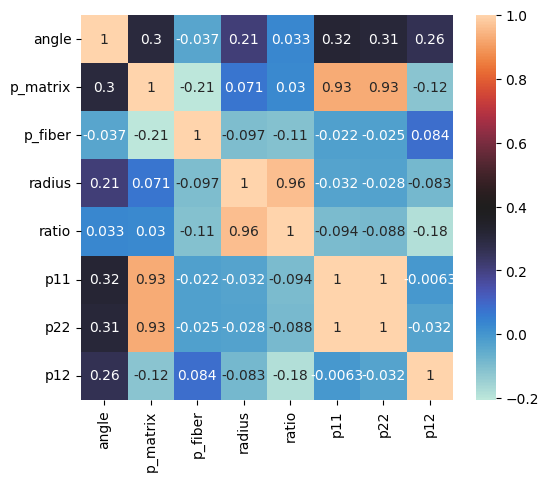

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(6,5))

sns.heatmap(data.corr(), annot=True, linewidths=0, cmap="icefire")

In [9]:
# Import utils
from utils.kfold import *
from utils.pipeline import *
from utils.tuning import *


2023-12-17 08:22:30.723961: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-17 08:22:30.763019: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-17 08:22:30.926913: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 08:22:30.926938: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 08:22:30.927540: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [10]:
import os
from datetime import datetime
import json

DIRECT_RESULTS_FOLDER = f"./direct-results/{datetime.now().strftime('%m%d_%H-%M-%S')}"

os.makedirs(DIRECT_RESULTS_FOLDER, exist_ok=True)

X = data[["angle","p_matrix","p_fiber","ratio"]]
y = data[["p12"]]

direct_results={}
direct_pipelines={}

for iteration in TUNING_ITERATIONS:
    pipeline_name=iteration.pipeline_factory.config.preprocessing_name+"-"+iteration.pipeline_factory.config.regressor_name

    # Create result file using pipeline regressor as name
    result_file = open(
        f"{DIRECT_RESULTS_FOLDER}/{pipeline_name}.json",
        "w",
    )

    # Run kfold
    result = iteration.run(X,y)

    print(result)
    print(result.__class__)

    # Save results
    json.dump({k:a.tolist() for k,a in result.items()}, result_file)

    # Close file
    result_file.close()

    # Save results in direct_results
    direct_results[pipeline_name]=result

    # Save iteration pipeline factory
    direct_pipelines[pipeline_name]=iteration.pipeline_factory


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END ................ MSE: (test=-2.304) R2: (test=0.140) total time=   0.0s
[CV] END ................ MSE: (test=-2.463) R2: (test=0.150) total time=   0.0s
[CV] END ................ MSE: (test=-2.490) R2: (test=0.144) total time=   0.0s
[CV] END ................ MSE: (test=-2.567) R2: (test=0.148) total time=   0.0s
[CV] END ................ MSE: (test=-2.599) R2: (test=0.155) total time=   0.0s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.03358197, 0.01836872, 0.01745605, 0.01171494, 0.01253104]), 'score_time': array([0.00279093, 0.00342989, 0.00312686, 0.0027163 , 0.00251794]), 'test_MSE': array([-2.30352275, -2.48969721, -2.46279016, -2.59856033, -2.56734954]), 'test_R2': array([0.14043252, 0.14417867, 0.15003868, 0.15454377, 0.14767766])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.2s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.2s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.2s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.2s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.1s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


{'fit_time': array([0.15708518, 0.14449406, 0.16255856, 0.13660526, 0.12121701]), 'score_time': array([0.01139927, 0.00850439, 0.00835252, 0.01406288, 0.00703955]), 'test_MSE': array([-0.00367874, -0.00403354, -0.00380176, -0.00407329, -0.00438271]), 'test_R2': array([0.99862726, 0.99861349, 0.99868793, 0.99867473, 0.998545  ])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/p

[CV] END ................ MSE: (test=-0.007) R2: (test=0.998) total time=   0.5s
[CV] END ................ MSE: (test=-0.006) R2: (test=0.998) total time=   0.6s
[CV] END ................ MSE: (test=-0.007) R2: (test=0.998) total time=   0.6s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s


[CV] END ................ MSE: (test=-0.006) R2: (test=0.998) total time=   0.7s
[CV] END ................ MSE: (test=-0.006) R2: (test=0.998) total time=   0.4s
{'fit_time': array([0.49203658, 0.50453472, 0.58841443, 0.38486862, 0.34254622]), 'score_time': array([0.09616518, 0.10121894, 0.0858798 , 0.08712053, 0.08647466]), 'test_MSE': array([-0.00612514, -0.0069426 , -0.00605831, -0.00692327, -0.00642645]), 'test_R2': array([0.99771438, 0.99761352, 0.99790915, 0.99774748, 0.99786651])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.4s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.4s
[CV] END ................ MSE: (test=-0.005) R2: (test=0.998) total time=   0.5s
[CV] END ................ MSE: (test=-0.005) R2: (test=0.998) total time=   0.5s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s


[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.4s
{'fit_time': array([0.36821222, 0.37729979, 0.38848305, 0.33093286, 0.28414679]), 'score_time': array([0.07539034, 0.07462263, 0.07638741, 0.07218671, 0.06608891]), 'test_MSE': array([-0.00376544, -0.00502537, -0.00453371, -0.00442252, -0.0044903 ]), 'test_R2': array([0.99859491, 0.99827255, 0.99843532, 0.99856111, 0.99850929])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV] END ................ MSE: (test=-0.020) R2: (test=0.994) total time=   0.5s
[CV] END ................ MSE: (test=-0.019) R2: (test=0.993) total time=   0.5s
[CV] END ................ MSE: (test=-0.018) R2: (test=0.993) total time=   0.5s
[CV] END ................ MSE: (test=-0.018) R2: (test=0.994) total time=   0.6s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.8s
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ................ MSE: (test=-0.018) R2: (test=0.994) total time=   0.5s
{'fit_time': array([0.43696833, 0.43208146, 0.50123453, 0.42367363, 0.38461447]), 'score_time': array([0.11033392, 0.1059854 , 0.11115694, 0.10406852, 0.09531093]), 'test_MSE': array([-0.01846489, -0.01945575, -0.01768112, -0.01986825, -0.01825277]), 'test_R2': array([0.99310976, 0.99331218, 0.99389787, 0.99353575, 0.99394035])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=   9.0s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=   9.7s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=   9.7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.7s remaining:   14.6s


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  10.8s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=   8.0s
{'fit_time': array([10.43666482,  9.3571887 ,  8.61896467,  9.27541995,  7.66045928]), 'score_time': array([0.34932041, 0.38196182, 0.36142182, 0.41669011, 0.33804202]), 'test_MSE': array([-0.00087296, -0.00102133, -0.00088959, -0.00100626, -0.00096644]), 'test_R2': array([0.99967425, 0.99964892, 0.99969298, 0.99967261, 0.99967916])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  23.2s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  24.0s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.0s remaining:   36.0s


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  24.4s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  24.6s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  20.4s
{'fit_time': array([22.9216733 , 23.20419502, 22.03312421, 23.57952523, 19.56693006]), 'score_time': array([1.08922744, 1.15052104, 1.20579076, 1.02646804, 0.83707976]), 'test_MSE': array([-0.00084014, -0.00098301, -0.00085686, -0.00090763, -0.00095393]), 'test_R2': array([0.9996865 , 0.9996621 , 0.99970428, 0.9997047 , 0.99968331])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 2.2min
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 2.3min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.4min


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 2.3min


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 2.3min
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  40.1s
{'fit_time': array([58.08576751, 58.43873954, 57.67814112, 55.26363826, 38.41458225]), 'score_time': array([78.0287323 , 77.08680177, 77.47322679, 79.65345883,  1.70201802]), 'test_MSE': array([-0.00085108, -0.00100114, -0.00085214, -0.00098255, -0.0009366 ]), 'test_R2': array([0.99968242, 0.99965586, 0.99970591, 0.99968032, 0.99968906])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END ................ MSE: (test=-1.295) R2: (test=0.517) total time=   0.1s
[CV] END ................ MSE: (test=-1.398) R2: (test=0.545) total time=   0.1s
[CV] END ................ MSE: (test=-1.353) R2: (test=0.535) total time=   0.1s
[CV] END ................ MSE: (test=-1.349) R2: (test=0.534) total time=   0.1s
[CV] END ................ MSE: (test=-1.403) R2: (test=0.534) total time=   0.0s
{'fit_time': array([0.11206293, 0.11786985, 0.11022758, 0.08733892, 0.04511642]), 'score_time': array([0.00762439, 0.00651431, 0.00657344, 0.01195335, 0.00404048]), 'test_MSE': array([-1.29549731, -1.3529149 , -1.34945629, -1.3984103 , -1.40277673]), 'test_R2': array([0.5165807 , 0.53494207, 0.5342739 , 0.54501934, 0.53429872])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END ................ MSE: (test=-0.003) R2: (test=0.999) total time=   0.6s
[CV] END ................ MSE: (test=-0.003) R2: (test=0.999) total time=   0.6s
[CV] END ................ MSE: (test=-0.003) R2: (test=0.999) total time=   0.7s
[CV] END ................ MSE: (test=-0.003) R2: (test=0.999) total time=   0.7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s


[CV] END ................ MSE: (test=-0.003) R2: (test=0.999) total time=   0.5s
{'fit_time': array([0.59716511, 0.67638397, 0.63616943, 0.69181156, 0.50544572]), 'score_time': array([0.01042128, 0.00906301, 0.00911498, 0.00811791, 0.00817633]), 'test_MSE': array([-0.003098  , -0.00299486, -0.00341058, -0.00333753, -0.0034105 ]), 'test_R2': array([0.99884397, 0.99897053, 0.99882294, 0.99891411, 0.99886776])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV] END ................ MSE: (test=-0.007) R2: (test=0.998) total time=   0.9s
[CV] END ................ MSE: (test=-0.006) R2: (test=0.998) total time=   1.0s
[CV] END ................ MSE: (test=-0.007) R2: (test=0.998) total time=   1.0s
[CV] END ................ MSE: (test=-0.007) R2: (test=0.998) total time=   1.1s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s


[CV] END ................ MSE: (test=-0.007) R2: (test=0.998) total time=   0.8s
{'fit_time': array([0.87272024, 0.90468025, 0.94398618, 0.80109453, 0.65083861]), 'score_time': array([0.12777758, 0.12074924, 0.11861897, 0.12087369, 0.10445356]), 'test_MSE': array([-0.00638927, -0.00658216, -0.00664495, -0.00746986, -0.00698188]), 'test_R2': array([0.99761582, 0.99773741, 0.99770669, 0.99756964, 0.99768212])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.8s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.8s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.9s
[CV] END ................ MSE: (test=-0.006) R2: (test=0.998) total time=   0.9s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s


[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.6s
{'fit_time': array([0.77086091, 0.78633666, 0.67371964, 0.71228647, 0.54671407]), 'score_time': array([0.09122062, 0.09930897, 0.0918808 , 0.09857583, 0.08011007]), 'test_MSE': array([-0.00381525, -0.00561166, -0.00406145, -0.00421106, -0.00430531]), 'test_R2': array([0.99857633, 0.99807102, 0.99859831, 0.99862991, 0.9985707 ])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV] END ................ MSE: (test=-0.014) R2: (test=0.995) total time=   1.0s
[CV] END ................ MSE: (test=-0.014) R2: (test=0.995) total time=   1.1s
[CV] END ................ MSE: (test=-0.013) R2: (test=0.995) total time=   1.1s
[CV] END ................ MSE: (test=-0.015) R2: (test=0.995) total time=   1.1s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.6s


[CV] END ................ MSE: (test=-0.014) R2: (test=0.995) total time=   0.9s
{'fit_time': array([0.95077991, 0.91101027, 0.84503341, 0.95516706, 0.72861719]), 'score_time': array([0.15649581, 0.14287353, 0.13202167, 0.14224482, 0.12340903]), 'test_MSE': array([-0.0130736 , -0.01441369, -0.01381376, -0.01469356, -0.01436983]), 'test_R2': array([0.99512154, 0.99504536, 0.99523258, 0.99521937, 0.99522943])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  37.6s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  39.3s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   39.3s remaining:   59.0s


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  40.4s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  41.9s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  33.9s
{'fit_time': array([40.03003001, 41.5345273 , 37.23018241, 38.89985394, 33.55289841]), 'score_time': array([0.38072658, 0.3723774 , 0.40233135, 0.39807034, 0.36375451]), 'test_MSE': array([-0.00113536, -0.00119876, -0.00133481, -0.0012401 , -0.00116536]), 'test_R2': array([0.99957634, 0.99958793, 0.99953933, 0.99959653, 0.99961312])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 1.7min


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 1.7min
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 1.7min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.6min


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 1.8min
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 1.4min
{'fit_time': array([104.11160469,  99.73725033, 102.68443155, 102.77441525,
        82.08919573]), 'score_time': array([0.91809988, 1.10142565, 1.06382251, 1.13408065, 0.86688042]), 'test_MSE': array([-0.00110172, -0.00124096, -0.001254  , -0.00119034, -0.00112035]), 'test_R2': array([0.99958889, 0.99957343, 0.99956722, 0.99961272, 0.99962806])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 4.7min
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 4.7min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.7min remaining:  7.0min
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 4.7min
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 4.7min
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 2.8min
{'fit_time': array([212.30978298, 221.55256534, 205.19279933, 220.04874587,
       168.69879556]), 'score_time': array([68.12890601, 60.82541156, 74.32091951, 61.7212913 ,  1.79477453]), 'test_MSE': array([-0.00107538, -0.00125309, -0.00126488, -0.00119542, -0.00112877]), 'test_R2': array([0.99959872, 0.99956926, 0.99956346, 0.99961106, 0.99962527])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END ................ MSE: (test=-2.306) R2: (test=0.204) total time=   0.0s
[CV] END ................ MSE: (test=-2.161) R2: (test=0.194) total time=   0.1s
[CV] END ................ MSE: (test=-2.426) R2: (test=0.211) total time=   0.0s
[CV] END ................ MSE: (test=-2.393) R2: (test=0.206) total time=   0.0s
[CV] END ................ MSE: (test=-2.347) R2: (test=0.193) total time=   0.1s
{'fit_time': array([0.08796811, 0.10910368, 0.04514217, 0.03596807, 0.02993941]), 'score_time': array([0.00570536, 0.00451732, 0.00469446, 0.00430417, 0.00350714]), 'test_MSE': array([-2.16119769, -2.34712708, -2.30607632, -2.42614744, -2.39267647]), 'test_R2': array([0.19354161, 0.19318646, 0.20412397, 0.21063927, 0.20566655])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.3s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.4s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.4s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.6s


[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.3s
[CV] END ................ MSE: (test=-0.004) R2: (test=0.999) total time=   0.3s
{'fit_time': array([0.32982659, 0.38092232, 0.38058305, 0.28204608, 0.31940198]), 'score_time': array([0.00864768, 0.01322198, 0.02788138, 0.00749493, 0.00722814]), 'test_MSE': array([-0.00366898, -0.00413044, -0.00385777, -0.00415039, -0.00446373]), 'test_R2': array([0.99863091, 0.99858018, 0.9986686 , 0.99864965, 0.99851811])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV] END ................ MSE: (test=-0.008) R2: (test=0.997) total time=   0.8s
[CV] END ................ MSE: (test=-0.007) R2: (test=0.998) total time=   0.8s
[CV] END ................ MSE: (test=-0.008) R2: (test=0.997) total time=   0.8s
[CV] END ................ MSE: (test=-0.008) R2: (test=0.997) total time=   0.8s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.3s


[CV] END ................ MSE: (test=-0.008) R2: (test=0.997) total time=   0.6s
{'fit_time': array([0.72537208, 0.73517704, 0.73881698, 0.70728207, 0.50413632]), 'score_time': array([0.09897494, 0.10754442, 0.1048758 , 0.0972507 , 0.08470559]), 'test_MSE': array([-0.00786688, -0.00779684, -0.00751013, -0.0072995 , -0.00773379]), 'test_R2': array([0.99706445, 0.99731987, 0.99740809, 0.99762507, 0.9974325 ])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV] END ................ MSE: (test=-0.005) R2: (test=0.998) total time=   0.6s
[CV] END ................ MSE: (test=-0.005) R2: (test=0.998) total time=   0.7s
[CV] END ................ MSE: (test=-0.005) R2: (test=0.998) total time=   0.7s
[CV] END ................ MSE: (test=-0.005) R2: (test=0.998) total time=   0.8s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s


[CV] END ................ MSE: (test=-0.005) R2: (test=0.998) total time=   0.5s
{'fit_time': array([0.58385706, 0.61417627, 0.67058992, 0.54388523, 0.43700719]), 'score_time': array([0.11889172, 0.08405757, 0.08135247, 0.07974863, 0.06815505]), 'test_MSE': array([-0.00498914, -0.00505594, -0.00513572, -0.00510185, -0.00530603]), 'test_R2': array([0.99813829, 0.99826205, 0.99822755, 0.99834008, 0.99823848])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

[CV] END ................ MSE: (test=-0.018) R2: (test=0.993) total time=   0.8s
[CV] END ................ MSE: (test=-0.018) R2: (test=0.994) total time=   0.9s
[CV] END ................ MSE: (test=-0.018) R2: (test=0.994) total time=   0.9s
[CV] END ................ MSE: (test=-0.017) R2: (test=0.994) total time=   0.9s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s


[CV] END ................ MSE: (test=-0.017) R2: (test=0.994) total time=   0.7s
{'fit_time': array([0.71678257, 0.79657888, 0.80273008, 0.79575682, 0.58501673]), 'score_time': array([0.11353707, 0.11084795, 0.12523866, 0.12347364, 0.10183764]), 'test_MSE': array([-0.0176487 , -0.01778572, -0.01699336, -0.01765008, -0.01669108]), 'test_R2': array([0.99341433, 0.99388624, 0.99413523, 0.99425745, 0.99445881])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  22.3s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  22.6s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  22.7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.6s remaining:   33.9s


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  22.9s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  19.2s
{'fit_time': array([22.23066807, 22.42853975, 22.09293079, 21.83247042, 18.86191773]), 'score_time': array([0.46989226, 0.4346776 , 0.47681308, 0.43933725, 0.35842752]), 'test_MSE': array([-0.0007331 , -0.00102697, -0.00086535, -0.00087038, -0.00080255]), 'test_R2': array([0.99972644, 0.99964698, 0.99970135, 0.99971682, 0.99973356])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  56.8s


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  58.5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   58.5s remaining:  1.5min


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  59.1s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  59.2s
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time=  47.2s
{'fit_time': array([58.01983762, 55.55491924, 57.21578264, 58.01114678, 46.28066015]), 'score_time': array([1.1703043 , 1.21063137, 1.25157976, 1.08202863, 0.87288952]), 'test_MSE': array([-0.00071525, -0.00102751, -0.00082143, -0.00087885, -0.00077557]), 'test_R2': array([0.9997331 , 0.9996468 , 0.99971651, 0.99971406, 0.99974252])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 3.2min


/home/gearrod/projects/thesis/materials-files/.env/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 3.3min


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.3min remaining:  4.9min


[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 3.3min
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 3.3min
[CV] END ................ MSE: (test=-0.001) R2: (test=1.000) total time= 1.6min
{'fit_time': array([118.66188359, 124.71021605, 130.38797402, 127.42163873,
        91.34610724]), 'score_time': array([75.7078619 , 72.06834078, 66.41321635, 68.38726616,  1.79310703]), 'test_MSE': array([-0.00072054, -0.00105263, -0.00081323, -0.00090262, -0.00078098]), 'test_R2': array([0.99973113, 0.99963816, 0.99971934, 0.99970633, 0.99974073])}
<class 'dict'>


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.8min finished


In [11]:
# Plot a bar chart with the results
# The plot has a bar for every metric grouped by the pipeline name
plot_data = pd.DataFrame(
    [
        {"Pipeline": p, "Metric": m, "Value": v if m not in ["test_MSE"] else -v}
        for p, r in direct_results.items()
        for m, l in r.items()
        for v in l
    ]
)

r_data = plot_data.groupby(["Pipeline", "Metric"]).mean().unstack(-1)
r_data.columns=r_data.columns.droplevel(0)
r_data

Metric,fit_time,score_time,test_MSE,test_R2
Pipeline,,,,
Degree 2 Polynomial-Baseline,0.094523,0.007341,1.359811,0.533023
Degree 2 Polynomial-DT,0.621395,0.008979,0.003250,0.998884
Degree 2 Polynomial-HBGB LR=0.05,0.878122,0.139409,0.014073,0.995170
Degree 2 Polynomial-HBGB LR=0.1,0.834664,0.118495,0.006814,0.997662
Degree 2 Polynomial-HBGB LR=0.4,0.697984,0.092219,0.004401,0.998489
Degree 2 Polynomial-RF,38.249498,0.383452,0.001215,0.999583
Degree 2 Polynomial-RF 250,98.279380,1.016862,0.001181,0.999594
Degree 2 Polynomial-RF MX40,205.560538,53.358261,0.001184,0.999594
Logarithmic+Cos-Baseline,0.061624,0.004546,2.326645,0.201432


In [12]:
repipe = direct_pipelines["Logarithmic-DT"].build()

repipe.fit(X, y)

real_val = data_val[["p12"]]
predicted_val = repipe.predict(
    data_val[["angle", "p_matrix", "p_fiber", "ratio"]]
)

KeyError: 'Logarithmic-DT'

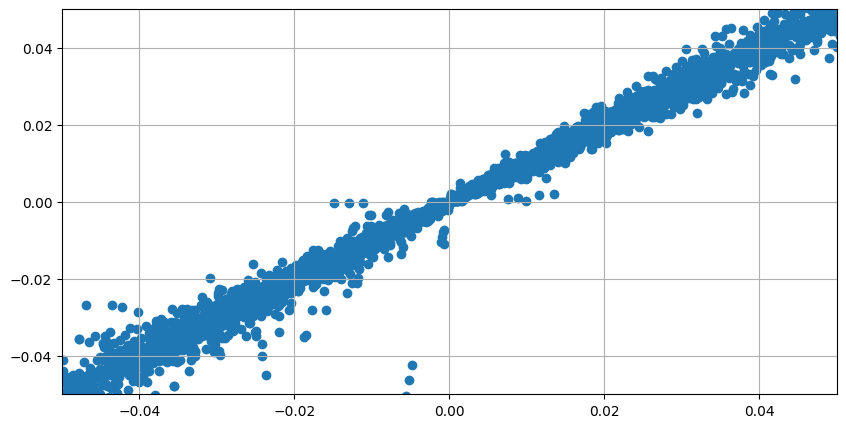

In [ ]:
plt.figure(figsize=(10, 5))

plt.xlim(-.05,.05)
plt.ylim(-.05,.05)

plt.grid(visible=True)
plt.scatter(real_val,predicted_val)

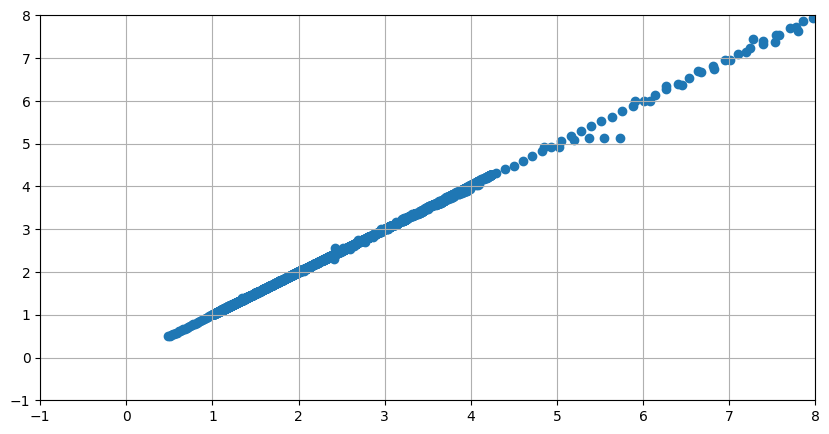

In [ ]:
repipe = direct_pipelines["Degree 2 Polynomial-DT"].build()

repipe.fit(X, data[["p11"]])

real_val = data_val_sp[["p11"]]
predicted_val = repipe.predict(data_val_sp[["angle", "p_matrix", "p_fiber", "ratio"]])

plt.figure(figsize=(10, 5))
plt.xlim(-1, 8)
plt.ylim(-1, 8)
plt.grid(visible=True)
plt.scatter(real_val, predicted_val)